In [14]:
from environments.utils import create_ta_features, add_time_features, get_data
import matplotlib.pyplot as plt

### Load data

In [15]:
sp500_df = get_data()
sp500_df_tech_indicators = create_ta_features()
sp500_df_tech_indicators_time_enc = add_time_features(sp500_df_tech_indicators)
sp500_df_tech_indicators_time_enc.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\Maciej\anaconda3\envs\pytorch_gpu\lib\site-packages\finta\finta.py:399: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for x, y in zip(x.fillna(0).iteritems(), y.iteritems()):
C:\Users\Maciej\anaconda3\envs\pytorch_gpu\lib\site-packages\finta\finta.py:399: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for x, y in zip(x.fillna(0).iteritems(), y.iteritems()):
C:\Users\Maciej\anaconda3\envs\pytorch_gpu\lib\site-packages\finta\finta.py:399: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for x, y in zip(x.fillna(0).iteritems(), y.iteritems()):
C:\Users\Maciej\anaconda3\envs\pytorch_gpu\lib\site-packages\finta\finta.py:399: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for x, y in zip(x.fillna(0).iteritems(), y.iteritems()):
C:\Users\Maciej\anaconda3\envs\pytorch_g

,open,high,low,close,volume,ADL,ADX,AO,ATR,BBWIDTH,...,WILLIAMS,WMA,WOBV,ZLEMA,sin_weekday,cos_weekday,sin_monthday,cos_monthday,sin_yearday,cos_yearday
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,-1.298686,-1.286505,-1.293132,-1.282682,0.057434,-1.916319,7.381934,-0.234498,-0.653191,0.683799,...,-1.980814,-1.271013,-1.099913,-1.313648,0.000000,1.000000,0.930874,0.365341,0.100362,0.994951
2010-01-05,-1.282409,-1.283732,-1.279795,-1.279113,-1.483494,-1.910779,7.381934,-0.234498,-0.653191,0.683799,...,-1.980814,-1.271013,-1.099913,-1.313648,0.951057,0.309017,0.997204,0.074730,0.125333,0.992115
2010-01-06,-1.279326,-1.281159,-1.275428,-1.278486,1.065213,-1.908295,7.381934,-0.234498,-0.653191,0.683799,...,-1.980814,-1.271013,-1.098161,-1.313648,0.587785,-0.809017,0.974928,-0.222521,0.150226,0.988652
2010-01-07,-1.278759,-1.277874,-1.278105,-1.273885,1.371287,-1.897865,7.381934,-0.234498,-0.653191,0.683799,...,-1.980814,-1.271013,-1.084537,-1.313648,-0.587785,-0.809017,0.866025,-0.500000,0.175023,0.984564
2010-01-08,-1.274463,-1.274930,-1.273117,-1.270558,0.466385,-1.888687,7.381934,-0.234498,-0.653191,0.683799,...,-1.980814,-1.271013,-1.076332,-1.313648,-0.951057,0.309017,0.680173,-0.733052,0.199710,0.979855


In [16]:
sp500_df.head()

,open,high,low,close,volume
Date,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,4389590000


### Create environment

In [17]:
from environments.environment import SP500TradingEnv
my_env = SP500TradingEnv(sp500_df_tech_indicators_time_enc, sp500_df, window_len=60)

C:\Users\Maciej\anaconda3\envs\pytorch_gpu\lib\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


In [18]:
my_env.action_space

Box([0.], [1.], (1,), float32)

In [19]:
my_env.observation_space

Box([[-1.3885745 -1.3879044 -1.4006886 ... -0.9888308 -0.999921  -1.       ]
 [-1.3885745 -1.3879044 -1.4006886 ... -0.9888308 -0.999921  -1.       ]
 [-1.3885745 -1.3879044 -1.4006886 ... -0.9888308 -0.999921  -1.       ]
 ...
 [-1.3885745 -1.3879044 -1.4006886 ... -0.9888308 -0.999921  -1.       ]
 [-1.3885745 -1.3879044 -1.4006886 ... -0.9888308 -0.999921  -1.       ]
 [-1.3885745 -1.3879044 -1.4006886 ... -0.9888308 -0.999921  -1.       ]], [[2.4298353 2.4157605 2.4364777 ... 1.        0.999921  1.       ]
 [2.4298353 2.4157605 2.4364777 ... 1.        0.999921  1.       ]
 [2.4298353 2.4157605 2.4364777 ... 1.        0.999921  1.       ]
 ...
 [2.4298353 2.4157605 2.4364777 ... 1.        0.999921  1.       ]
 [2.4298353 2.4157605 2.4364777 ... 1.        0.999921  1.       ]
 [2.4298353 2.4157605 2.4364777 ... 1.        0.999921  1.       ]], (60, 72), float32)

In [20]:
my_env.get_observation()

array([[-1.29868629, -1.2865047 , -1.29313151, ...,  0.36534102,
         0.10036171,  0.99495102],
       [-1.2824092 , -1.28373157, -1.27979507, ...,  0.07473009,
         0.12533323,  0.9921147 ],
       [-1.27932572, -1.28115947, -1.27542772, ..., -0.22252093,
         0.15022559,  0.98865174],
       ...,
       [-1.24710511, -1.24625422, -1.24740075, ...,  0.07473009,
         0.84432793, -0.53582679],
       [-1.24697368, -1.24532993, -1.24105831, ..., -0.73305187,
         0.80156698, -0.59790498],
       [-1.24086719, -1.24233578, -1.23982638, ..., -0.90096887,
         0.78628843, -0.61785961]])

In [21]:
from stable_baselines3 import A2C
model = A2C("MlpPolicy", my_env, verbose=1)
model.learn(total_timesteps=150_000)

vec_env = model.get_env()
obs = vec_env.reset()
for i in range(3250):
    action, _state = model.predict(obs, deterministic=True)
    obs, reward, done, info = vec_env.step(action)
    vec_env.render()

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
-------------------------------------
| time/                 |           |
|    fps                | 198       |
|    iterations         | 100       |
|    time_elapsed       | 2         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -1.43     |
|    explained_variance | -0.209    |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | -0.000502 |
|    std                | 1.01      |
|    value_loss         | 7.84e-07  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 201       |
|    iterations         | 200       |
|    time_elapsed       | 4         |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -1.42     |
|    explained_variance | -2.84

In [22]:
from stable_baselines3 import PPO
model = PPO("MlpPolicy", my_env, verbose=1)
model.learn(total_timesteps=150_000)

vec_env = model.get_env()
obs = vec_env.reset()
for i in range(3200):
    action, _state = model.predict(obs, deterministic=True)
    obs, reward, done, info = vec_env.step(action)
    vec_env.render()

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
-----------------------------
| time/              |      |
|    fps             | 246  |
|    iterations      | 1    |
|    time_elapsed    | 8    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 3.21e+03    |
|    ep_rew_mean          | 0.17        |
| time/                   |             |
|    fps                  | 218         |
|    iterations           | 2           |
|    time_elapsed         | 18          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.022074912 |
|    clip_fraction        | 0.11        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.41       |
|    explained_variance   | -1.15       |
|    learning_rate        | 0.0003      |
|    loss              

In [23]:
my_env_ppo_test = SP500TradingEnv(sp500_df_tech_indicators_time_enc, sp500_df, window_len=60)

obs = my_env_ppo_test.reset()
for i in range(3200):
    action, _state = model.predict(obs, deterministic=True)
    obs, reward, done, info = my_env_ppo_test.step(action)
    my_env_ppo_test.render()

C:\Users\Maciej\anaconda3\envs\pytorch_gpu\lib\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


Episode tick: 1
Portfolio value: [1.]
SP500: [0.]
Cash: [1.]
Done: False
Episode tick: 2
Portfolio value: [1.]
SP500: [0.]
Cash: [1.]
Done: False
Episode tick: 3
Portfolio value: [1.0004547]
SP500: [0.27035964]
Cash: [0.73009497]
Done: False
Episode tick: 4
Portfolio value: [1.0004547]
SP500: [0.]
Cash: [1.0004547]
Done: False
Episode tick: 5
Portfolio value: [1.0004547]
SP500: [0.]
Cash: [1.0004547]
Done: False
Episode tick: 6
Portfolio value: [1.0004547]
SP500: [0.]
Cash: [1.0004547]
Done: False
Episode tick: 7
Portfolio value: [1.0004547]
SP500: [0.]
Cash: [1.0004547]
Done: False
Episode tick: 8
Portfolio value: [1.0004547]
SP500: [0.]
Cash: [1.0004547]
Done: False
Episode tick: 9
Portfolio value: [1.0004547]
SP500: [0.]
Cash: [1.0004547]
Done: False
Episode tick: 10
Portfolio value: [1.0004547]
SP500: [0.]
Cash: [1.0004547]
Done: False
Episode tick: 11
Portfolio value: [1.0004547]
SP500: [0.]
Cash: [1.0004547]
Done: False
Episode tick: 12
Portfolio value: [1.0004547]
SP500: [0.]
Ca

NameError: name 'env' is not defined

info {'total_reward': 1193.3665876897169, 'total_profit': 0.9790739300758149, 'position': 1}


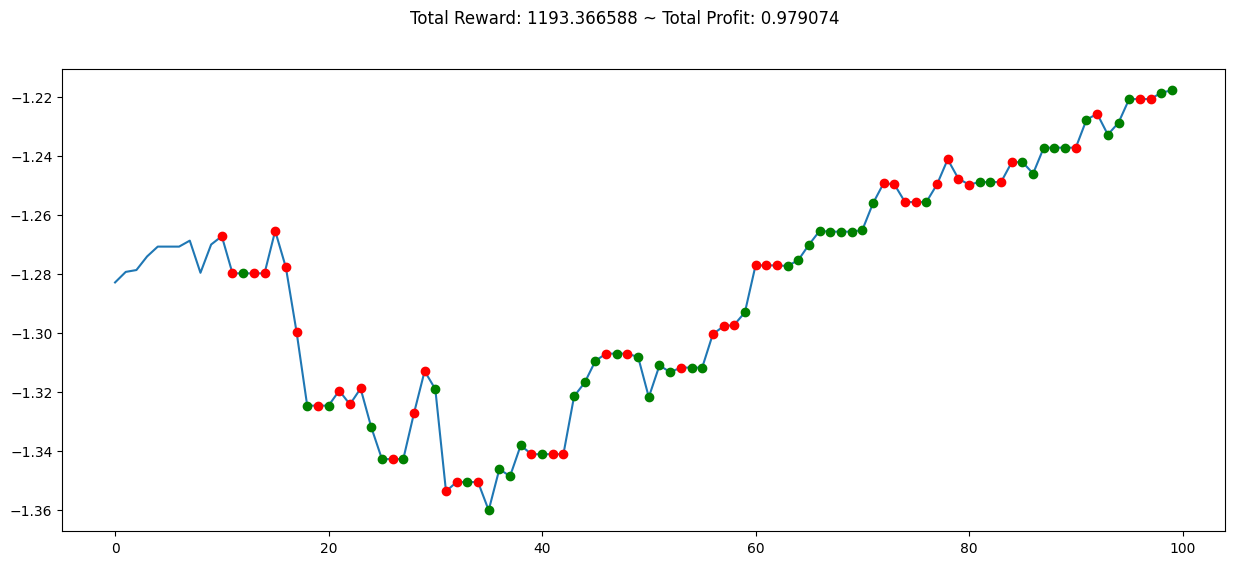

In [13]:
state = env.reset()
while True:
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done:
        print("info", info)
        break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()